In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
amazon = pd.read_csv('amazon_cells_labelled.txt',delimiter= '\t', header=None)
amazon.columns = ['review', 'positive']
amazon.head()

,review,positive
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [3]:
#['good', 'great', 'must have', 'highly recommend', 'well', 'nice', 'love', 'best', 'will order', 'super', 'excellent', 'well', 'beautiful', 'works']
keywords_1 = ['will order', 'super', 'excellent', 'well', 'beautiful', 'works']

for key in keywords_1:
    amazon[str(key)] = amazon.review.str.contains(str(key), case=False)
    

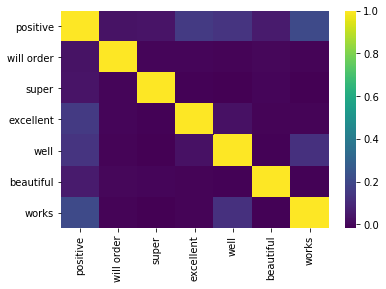

In [4]:
sns.heatmap(amazon.corr(), cmap='viridis')
plt.show()

In [5]:
amazon.head()

,review,positive,will order,super,excellent,well,beautiful,works
0,So there is no way for me to plug it in here i...,0,False,False,False,False,False,False
1,"Good case, Excellent value.",1,False,False,True,False,False,False
2,Great for the jawbone.,1,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,False,False,False,False,False,False
4,The mic is great.,1,False,False,False,False,False,False


In [7]:
data = amazon[keywords_1]
target = amazon['positive']

In [10]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state = 20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))



With 20% Holdout: 0.57
Testing on Sample: 0.593


In [11]:
keywords_2 = ['well', 'nice', 'love', 'best']
for key in keywords_2:
    amazon[str(key)] = amazon.review.str.contains(str(key), case=False)

In [16]:
data = amazon[keywords_1 + keywords_2]
target = amazon['positive']

In [17]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state = 20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))


With 20% Holdout: 0.63
Testing on Sample: 0.652


In [18]:
keywords_3 = ['must have', 'highly recommend']
for key in keywords_3:
    amazon[str(key)] = amazon.review.str.contains(str(key), case=False)

In [19]:
data = amazon[keywords_1 + keywords_2 + keywords_3]
target = amazon['positive']

In [20]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state = 20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.64
Testing on Sample: 0.662


In [21]:
keywords_4 = ['good', 'great']
for key in keywords_4:
    amazon[str(key)] = amazon.review.str.contains(str(key), case=False)

In [22]:
data = amazon[keywords_1 + keywords_2 + keywords_3 + keywords_4]
target = amazon['positive']

In [23]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state = 20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.73
Testing on Sample: 0.75


## Do any of your classifiers seem to overfit?

No the 20% holdout and the whole sample give consistent scores, so no overfitting.

## Which seem to perform the best? Why?

The last classifier seems to be the best one, because it gives the highest score.

## Which features seemed to be most impactful to performance?

I think the feature introduced by keywords_4 are the most important features, those two features improved the score by 10% alone.